## Step 1: Data Analysis 

### Data Loading and Initial Inspections

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path_davranis = "data/davranis.csv"
path_ilan = "data/ilan_bilgileri.csv"

davranis = pd.read_csv(path_davranis)
ilan = pd.read_csv(path_ilan)

print(f"""
      Columns of user_interaction data is {davranis.columns}, /n
      Columns of ad_listing data is {ilan.columns}, /n 
      """)

/tmp/ipykernel_1109168/3922746966.py:5: DtypeWarning: Columns (20,23) have mixed types. Specify dtype option on import or set low_memory=False.
  ilan = pd.read_csv(path_ilan)



      Columns of user_interaction data is Index(['session_id', 'timestamp', 'product_id', 'client_id', 'search_id',
       'device_category', 'page_path', 'product_list_name', 'page_number',
       'query', 'event_type', 'transaction_id', 'transaction_type',
       'ds_search_id', 'il', 'ilce', 'mahalle', 'kategori_3', 'browser_size',
       'product_list_position', 'kategori_1', 'kategori_2', 'others',
       'etl_date'],
      dtype='object'), /n
      Columns of ad_listing data is Index(['id', 'category_id', 'kategori_1', 'kategori_2', 'kategori_3',
       'mahalle', 'ilce', 'il', 'created_at', 'updated_at', 'ilan_baslik',
       'ilan_fiyat', 'ilan_sahip_adi', 'site_icinde_mi', 'm2_gross', 'm2_net',
       'bina_kat_sayisi', 'etl_date', 'row_num', 'cephe', 'sosyal_imkanlar',
       'bina_ozellikleri', 'ulasim', 'oda_sayisi', 'ilan_kat_sayisi',
       'bina_yasi'],
      dtype='object'), /n 
      


In [3]:
print(davranis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323335 entries, 0 to 323334
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   session_id             323335 non-null  object
 1   timestamp              323335 non-null  object
 2   product_id             323335 non-null  object
 3   client_id              323335 non-null  object
 4   search_id              323335 non-null  object
 5   device_category        323335 non-null  object
 6   page_path              323335 non-null  object
 7   product_list_name      323335 non-null  object
 8   page_number            323335 non-null  int64 
 9   query                  323335 non-null  object
 10  event_type             323335 non-null  object
 11  transaction_id         28604 non-null   object
 12  transaction_type       28604 non-null   object
 13  ds_search_id           323335 non-null  int64 
 14  il                     318456 non-null  object
 15  

In [4]:
davranis.head(5)

,session_id,timestamp,product_id,client_id,search_id,device_category,page_path,product_list_name,page_number,query,...,il,ilce,mahalle,kategori_3,browser_size,product_list_position,kategori_1,kategori_2,others,etl_date
0,b1f007aa-1f0a-4d9f-9cd0-7fe0d6e79de6,2023-07-04 20:58:02.820,13505245,DS22495690.1688504111,3wo5GKkoPYnjq1ZpK3L4C8obpuNUNr0z,mobile,/satilik-daire/istanbul/?max_fiyat=1000000&yat...,ilan-listeleme,1,/satilik-daire/istanbul/?max_fiyat=1000000&yat...,...,istanbul,NaN,NaN,daire,380x550,1,satilik,konut,"{""max_fiyat"": [""1000000""], ""yapi_ozellik[]"": [...",2023-07-04
1,c91da170-a268-456a-a809-7782fc18001b,2023-07-04 19:21:34.769,13505409,DS1762444148.1688493676,x8R0NEVY7CStbjHgaS6K5qNxt7ofLloy,mobile,/satilik-arsa/,ilan-listeleme,1,/satilik-arsa/,...,NaN,NaN,NaN,NaN,390x740,6,satilik,arsa,NaN,2023-07-04
2,c91da170-a268-456a-a809-7782fc18001b,2023-07-04 19:22:56.962,13505693,DS1762444148.1688493676,nCDfXLfnkFnxr5eTru51vlOScApXA2Ht,mobile,/satilik-arsa/,ilan-listeleme,1,/satilik-arsa/,...,NaN,NaN,NaN,NaN,390x740,4,satilik,arsa,NaN,2023-07-04
3,9a8699ef-593b-41a3-85c6-767ce478ef35,2023-07-04 17:22:15.628,13505616,DS1093390036.1681374194,ZNhboFniuiNoDNhLCQUfucxSM9gEyD30,mobile,/satilik-arsa/,ilan-listeleme,1,/satilik-arsa/,...,NaN,NaN,NaN,NaN,410x780,5,satilik,arsa,NaN,2023-07-04
4,ef05e658-5848-4dfe-a2c3-ac8b0b8b3873,2023-07-04 19:30:16.315,13505616,DS643656975.1687979603,hEB9dtq1M05LThVNCpwOTWRTi3mIsBDU,mobile,/satilik-arsa/,ilan-listeleme,1,/satilik-arsa/,...,NaN,NaN,NaN,NaN,380x730,7,satilik,arsa,NaN,2023-07-04


#### drop the unnecessary

In [5]:
for col in davranis.columns:
    print(f"{col} {len(pd.unique(davranis[col]))}")

session_id 162863
timestamp 322893
product_id 78828
client_id 131110
search_id 212146
device_category 3
page_path 48327
product_list_name 2
page_number 1
query 40499
event_type 2
transaction_id 28605
transaction_type 6
ds_search_id 174577
il 82
ilce 1991
mahalle 10201
kategori_3 177
browser_size 1092
product_list_position 30
kategori_1 2
kategori_2 7
others 9124
etl_date 2


In [6]:
print(davranis['transaction_type'].unique())

[nan 'telefon-et' 'favoriler' 'paylas' 'whatsapp' 'mesaj-gonder']


In [7]:
cols = ['search_id', 'device_category', 'page_path', 'page_number', 
         'transaction_id','ds_search_id', 'browser_size', 
        'others', 'etl_date']


davranis_2 = davranis.drop(columns=cols, errors='ignore')  
davranis_2.columns

Index(['session_id', 'timestamp', 'product_id', 'client_id',
       'product_list_name', 'query', 'event_type', 'transaction_type', 'il',
       'ilce', 'mahalle', 'kategori_3', 'product_list_position', 'kategori_1',
       'kategori_2'],
      dtype='object')

davranis_2 == DROPPED ['search_id', 'device_category', 'page_path', 'page_number', 'query', 'transaction_id','ds_search_id', 'browser_size', 'others', 'etl_date']

In [8]:
davranis_2.head()

,session_id,timestamp,product_id,client_id,product_list_name,query,event_type,transaction_type,il,ilce,mahalle,kategori_3,product_list_position,kategori_1,kategori_2
0,b1f007aa-1f0a-4d9f-9cd0-7fe0d6e79de6,2023-07-04 20:58:02.820,13505245,DS22495690.1688504111,ilan-listeleme,/satilik-daire/istanbul/?max_fiyat=1000000&yat...,click,NaN,istanbul,NaN,NaN,daire,1,satilik,konut
1,c91da170-a268-456a-a809-7782fc18001b,2023-07-04 19:21:34.769,13505409,DS1762444148.1688493676,ilan-listeleme,/satilik-arsa/,click,NaN,NaN,NaN,NaN,NaN,6,satilik,arsa
2,c91da170-a268-456a-a809-7782fc18001b,2023-07-04 19:22:56.962,13505693,DS1762444148.1688493676,ilan-listeleme,/satilik-arsa/,click,NaN,NaN,NaN,NaN,NaN,4,satilik,arsa
3,9a8699ef-593b-41a3-85c6-767ce478ef35,2023-07-04 17:22:15.628,13505616,DS1093390036.1681374194,ilan-listeleme,/satilik-arsa/,click,NaN,NaN,NaN,NaN,NaN,5,satilik,arsa
4,ef05e658-5848-4dfe-a2c3-ac8b0b8b3873,2023-07-04 19:30:16.315,13505616,DS643656975.1687979603,ilan-listeleme,/satilik-arsa/,click,NaN,NaN,NaN,NaN,NaN,7,satilik,arsa


#### Apply conversion for the required columns,

In [9]:
davranis_2['timestamp'] = pd.to_datetime(davranis_2['timestamp'], errors='coerce')
# davranis_2['product_id'] = davranis_2['product_id'].astype('int64') # below
davranis_2['product_list_name'] = davranis_2 ['product_list_name'].astype(str)
davranis_2['transaction_type'] = davranis_2 ['transaction_type'].astype(str)
davranis_2['il'] = davranis_2 ['il'].astype(str)
davranis_2['ilce'] = davranis_2 ['ilce'].astype(str)
davranis_2['mahalle'] = davranis_2 ['mahalle'].astype(str)
davranis_2['kategori_3'] = davranis_2 ['kategori_3'].astype(str)
davranis_2['kategori_2'] = davranis_2 ['kategori_2'].astype(str)
davranis_2['kategori_1'] = davranis_2 ['kategori_1'].astype(str)


In [10]:
def product_id_convert(value):
    try:
        return int(value)
    except ValueError:
        return None

davranis_2['product_id'] = davranis_2['product_id'].apply(product_id_convert)
davranis_2 = davranis_2.dropna(subset=['product_id']) # Drop rows with None values in 'product_id'
davranis_2['product_id'] = davranis_2['product_id'].astype('int64') # Convert the column to int64
print(davranis_2)



                                  session_id               timestamp  \
0       b1f007aa-1f0a-4d9f-9cd0-7fe0d6e79de6 2023-07-04 20:58:02.820   
1       c91da170-a268-456a-a809-7782fc18001b 2023-07-04 19:21:34.769   
2       c91da170-a268-456a-a809-7782fc18001b 2023-07-04 19:22:56.962   
3       9a8699ef-593b-41a3-85c6-767ce478ef35 2023-07-04 17:22:15.628   
4       ef05e658-5848-4dfe-a2c3-ac8b0b8b3873 2023-07-04 19:30:16.315   
...                                      ...                     ...   
323330  5e2c80da-2e68-4a42-9a30-fd5fe652098c 2023-07-03 12:27:57.570   
323331  350669e0-5a91-4c35-9cb5-d81499918461 2023-07-03 20:24:34.427   
323332  33eeb6de-6873-4fca-a625-6e00251eace3 2023-07-03 19:17:00.929   
323333  00c22005-70c3-4691-ae49-f6328e562f25 2023-07-03 11:24:58.113   
323334  da00265e-eff0-4b98-816d-2fd546e6eb74 2023-07-03 17:40:25.336   

        product_id                client_id product_list_name  \
0         13505245    DS22495690.1688504111    ilan-listeleme   
1    

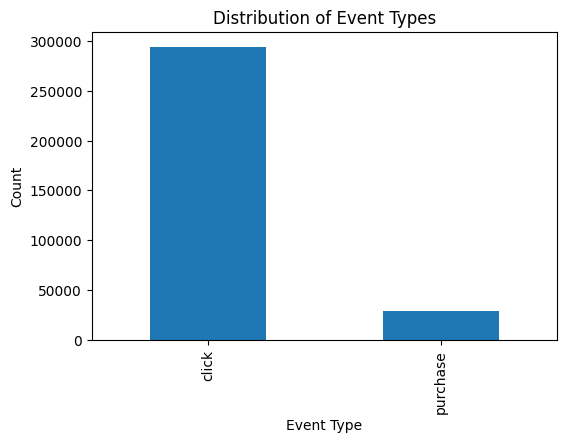

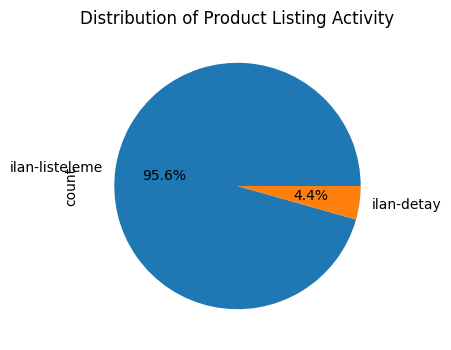

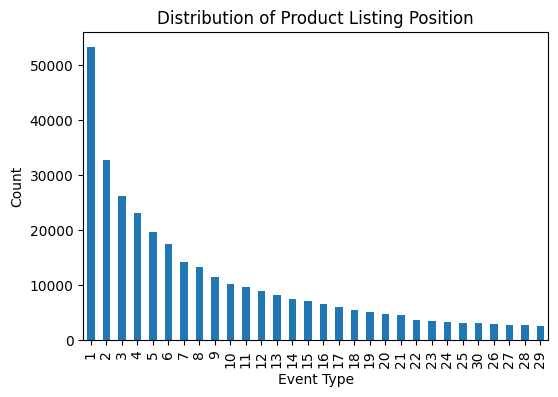

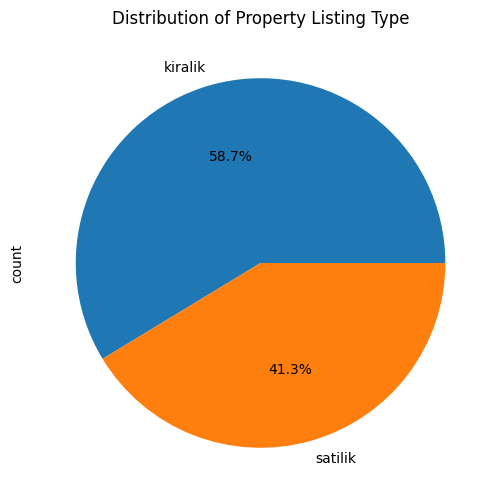

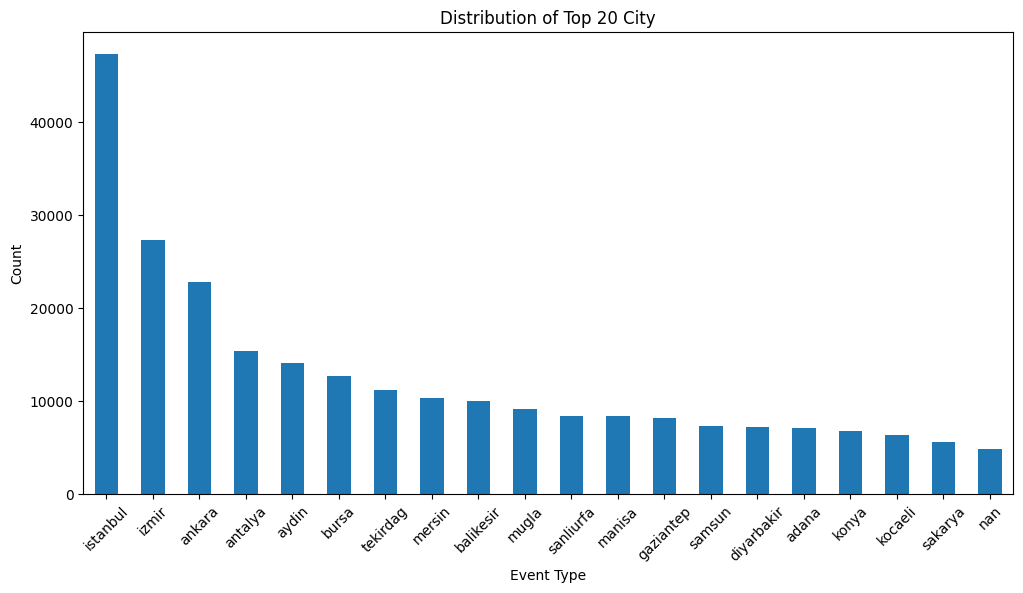

In [11]:
# Event type distribution
plt.figure(figsize=(6, 4))
davranis_2['event_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

# product_list_name category distribution
plt.figure(figsize=(6, 4))
davranis_2['product_list_name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Product Listing Activity')
plt.show()

# product_list_position distribution
plt.figure(figsize=(6, 4))
davranis_2['product_list_position'].value_counts().plot(kind='bar')
plt.title('Distribution of Product Listing Position')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

# Device category distribution
plt.figure(figsize=(6, 6))
davranis_2['kategori_1'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Property Listing Type')
plt.show()

# Get the top 20 most frequent event types
top_20_events = davranis_2['il'].value_counts().nlargest(20)
plt.figure(figsize=(12, 6))  # Increase width for better readability
top_20_events.plot(kind='bar')
plt.title('Distribution of Top 20 City')
plt.xlabel('Event Type')
plt.ylabel('Count')

# Rotate x-axis labels for better readability if they are long
plt.xticks(rotation=45) 

plt.show()


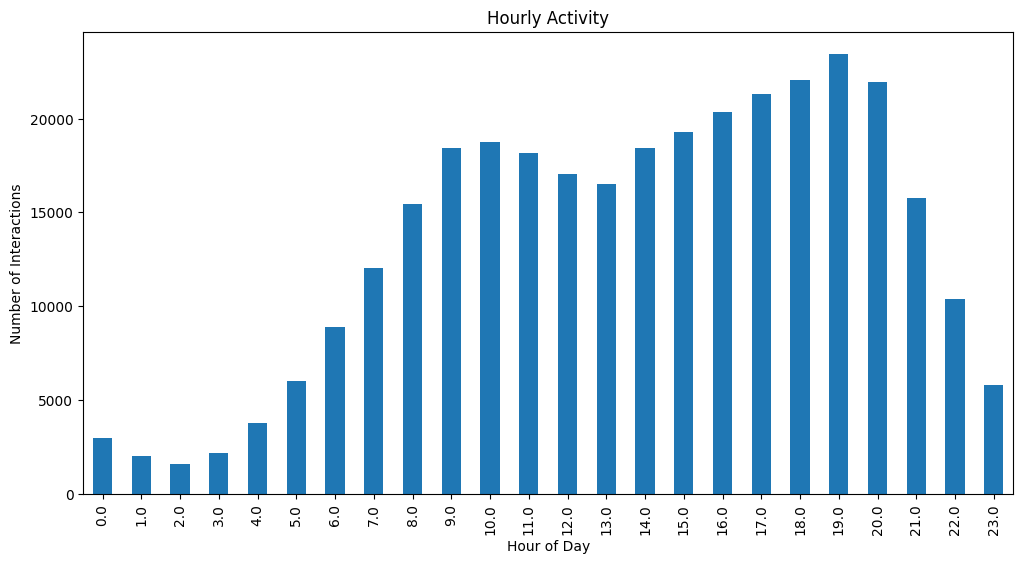

In [12]:
davranis_2['hour'] = davranis_2['timestamp'].dt.hour
davranis_2['day_of_week'] = davranis_2['timestamp'].dt.dayofweek

# Hourly activity
plt.figure(figsize=(12, 6))
davranis_2['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Hourly Activity')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Interactions')
plt.show()


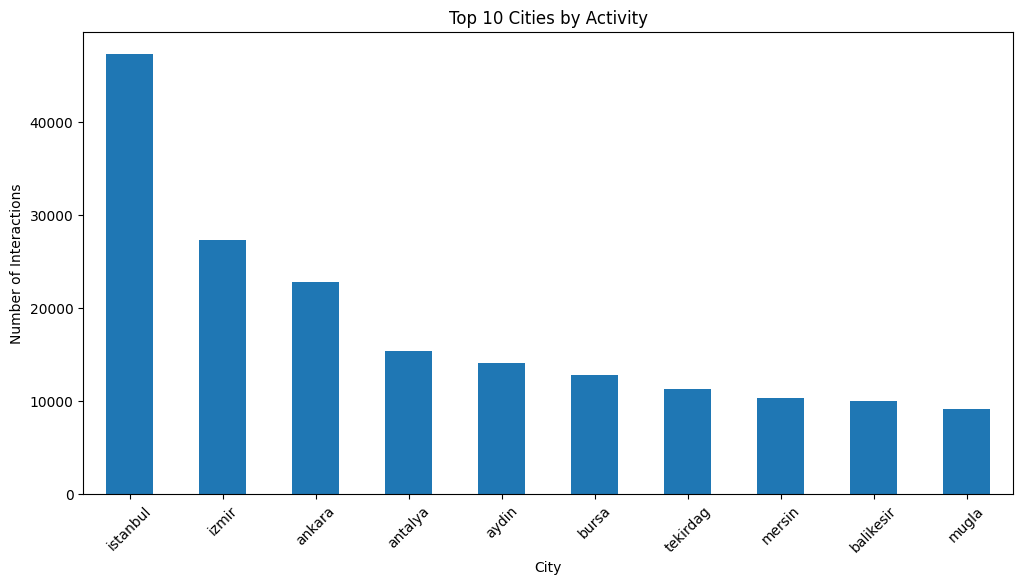

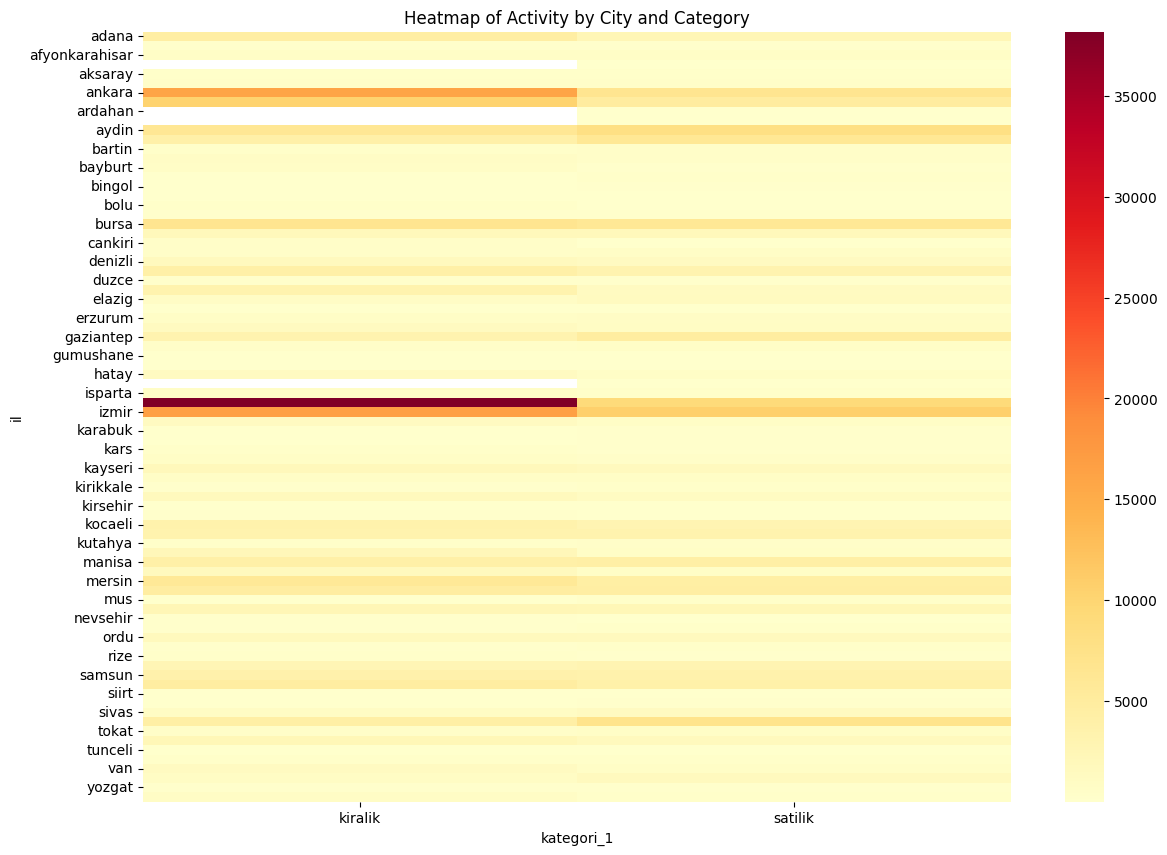

In [13]:
# Top 10 cities (il) by activity
plt.figure(figsize=(12, 6))
davranis_2['il'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Cities by Activity')
plt.xlabel('City')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

# Heatmap of activity by city and category
city_category_counts = davranis_2.groupby(['il', 'kategori_1']).size().unstack()
plt.figure(figsize=(14, 10))
sns.heatmap(city_category_counts, cmap='YlOrRd')
plt.title('Heatmap of Activity by City and Category')
plt.show()

Average interactions per user: 2.47


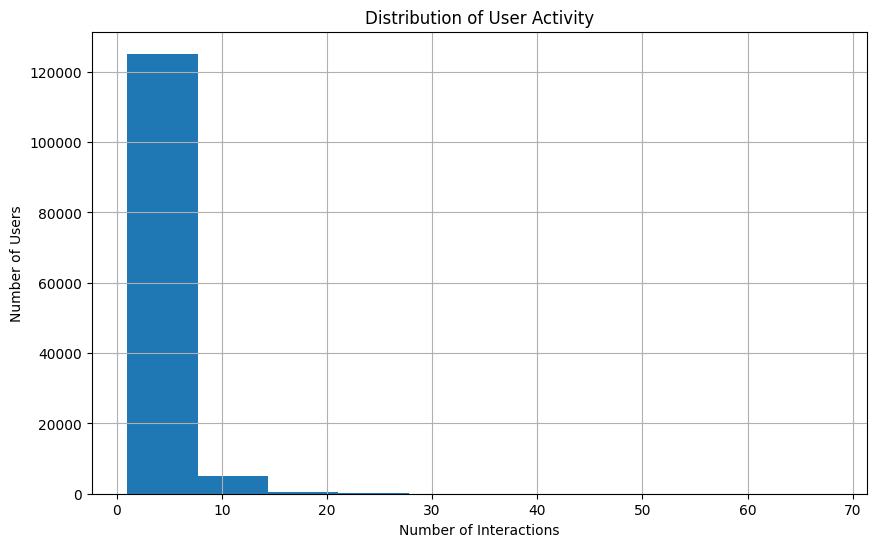

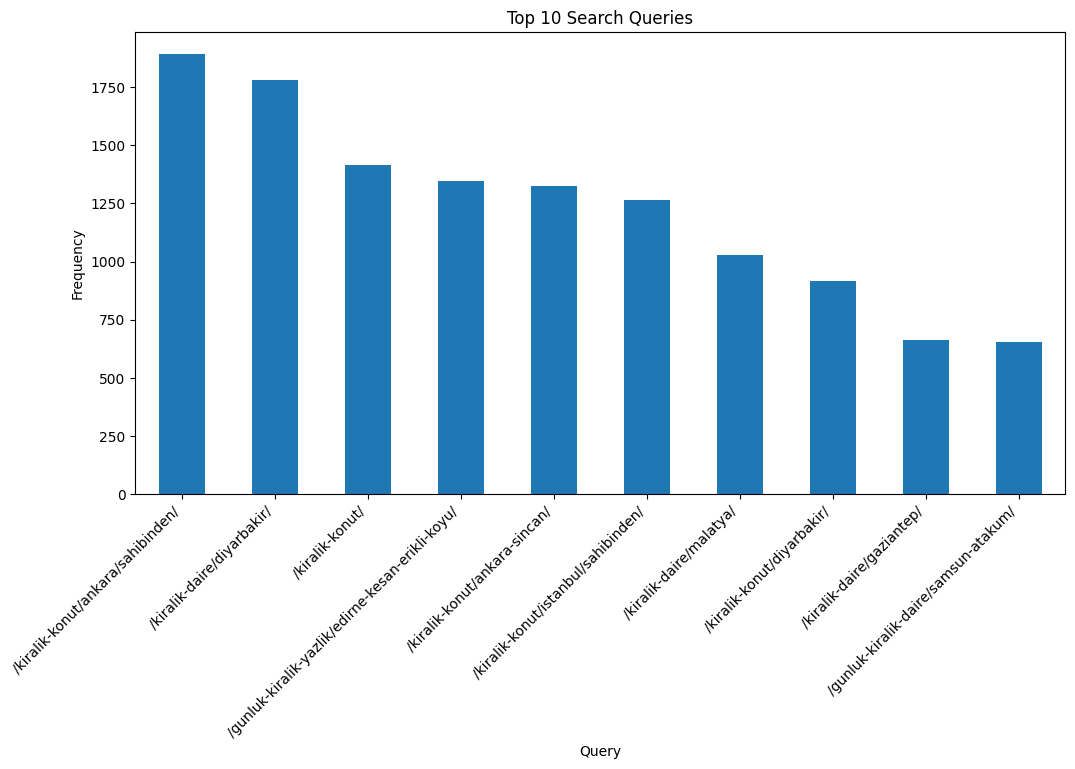

In [14]:
# Average number of interactions per user
avg_interactions = davranis_2.groupby('client_id').size().mean()
print(f"Average interactions per user: {avg_interactions:.2f}")

# Distribution of user activity
user_activity = davranis_2.groupby('client_id').size()
plt.figure(figsize=(10, 6))
user_activity.hist(bins=10)
plt.title('Distribution of User Activity')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

# Most common search queries
top_queries = davranis_2['query'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_queries.plot(kind='bar')
plt.title('Top 10 Search Queries')
plt.xlabel('Query')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

## 1.2  AD NODES

In [15]:
print(ilan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376618 entries, 0 to 376617
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                376618 non-null  int64  
 1   category_id       376618 non-null  int64  
 2   kategori_1        376618 non-null  object 
 3   kategori_2        376618 non-null  object 
 4   kategori_3        376618 non-null  object 
 5   mahalle           376618 non-null  object 
 6   ilce              376090 non-null  object 
 7   il                376618 non-null  object 
 8   created_at        376618 non-null  object 
 9   updated_at        376618 non-null  object 
 10  ilan_baslik       376618 non-null  object 
 11  ilan_fiyat        376070 non-null  float64
 12  ilan_sahip_adi    375751 non-null  object 
 13  site_icinde_mi    376618 non-null  bool   
 14  m2_gross          376050 non-null  float64
 15  m2_net            225843 non-null  float64
 16  bina_kat_sayisi   22

In [16]:
ilan.head()

,id,category_id,kategori_1,kategori_2,kategori_3,mahalle,ilce,il,created_at,updated_at,...,bina_kat_sayisi,etl_date,row_num,cephe,sosyal_imkanlar,bina_ozellikleri,ulasim,oda_sayisi,ilan_kat_sayisi,bina_yasi
0,8573826,3,sale,isyeri,bina-isyeri,Gülbahçe Mahallesi,Yunusemre,Manisa,2020-08-12 14:46:55.764 UTC,2023-04-06 08:55:16.379965 UTC,...,2.0,2023-07-06 00:12:52.5169 UTC,1,NaN,NaN,Bahçe - Müstakil&Mutfak&Alüminyum Doğrama&Hidr...,NaN,4&4,Düz giriş,1
1,9287649,3,rent,isyeri,magaza,Merkez Mahallesi,Şişli,İstanbul,2021-02-28 11:09:05.023 UTC,2023-07-03 23:19:12.996804 UTC,...,9.0,2023-07-09 00:12:23.964997 UTC,1,NaN,NaN,Apartman Görevlisi&Yangın Merdiveni&Açık Otopa...,E-5&Hastaneye Yakın&Metro&Otoban&Otobüs&Metrob...,12&5+,Kot 2 (-2),21 ve üzeri
2,9759525,3,sale,isyeri,magaza,Kümbet Mahallesi,Sivas Merkez,Sivas,2021-07-14 07:46:59.831 UTC,2023-04-25 10:30:57.379989 UTC,...,2.0,2023-07-09 00:12:23.964997 UTC,1,NaN,NaN,Mutfak&Yangın Alarmı,NaN,4&4,Düz giriş,5-10
3,9915149,2,sale,konut,daire,Atatürk Mahallesi,Büyükçekmece,İstanbul,2021-08-25 21:07:34.6 UTC,2023-07-08 07:19:59.608567 UTC,...,NaN,2023-07-09 00:12:23.964997 UTC,1,Güney Cepheli,Alışveriş Merkezi&Bahçe&Engelliye Uygun&Açık O...,Su Deposu&Asansör&Ses Yalıtımı&Görüntülü Diafo...,Otobüs&Denize Yakın&Deniz Otobüsü&Anayol&E-5&M...,3+2,4,2
4,10625509,3,rent,isyeri,magaza,Aydıntepe Mahallesi,Tuzla,İstanbul,2022-02-08 07:43:29.109 UTC,2023-07-08 15:34:50.274758 UTC,...,2.0,2023-07-09 00:12:23.964997 UTC,1,NaN,NaN,Mutfak&Jeneratör&Güvenlik Kamerası&Hidrofor,Havaalanı,3&5+,Düz giriş,5-10


In [17]:
for col in ilan.columns:
    print(f"{col} {len(pd.unique(ilan[col]))}")

id 376618
category_id 4
kategori_1 5
kategori_2 4
kategori_3 69
mahalle 11223
ilce 831
il 82
created_at 376560
updated_at 374694
ilan_baslik 347170
ilan_fiyat 8490
ilan_sahip_adi 19446
site_icinde_mi 2
m2_gross 13421
m2_net 1277
bina_kat_sayisi 63
etl_date 11
row_num 1
cephe 55
sosyal_imkanlar 7405
bina_ozellikleri 35301
ulasim 27039
oda_sayisi 271
ilan_kat_sayisi 59
bina_yasi 10


In [18]:
print(ilan['kategori_1'].unique())
print(ilan['category_id'].unique())
print(ilan['kategori_2'].unique())
print(ilan['site_icinde_mi'].unique())
print(ilan['sosyal_imkanlar'].unique())

['sale' 'rent' 'sublet' 'daily_rent' 'flat_for_land']
[3 2 6 1]
['isyeri' 'konut' 'turistik-tesis' 'arsa']
[False  True]
[nan 'Alışveriş Merkezi&Bahçe&Engelliye Uygun&Açık Otopark&Çocuk Parkı'
 'Açık Otopark&Bahçe&Yürüyüş Parkuru&Açık Havuz' ...
 'Basketbol Sahası&Çocuk Parkı&Engelliye Uygun&Açık Otopark'
 'Alışveriş Merkezi&Açık Havuz&Kapalı Otopark&Fitness&Engelliye Uygun&Tenis Kortu&Çocuk Parkı&Kapalı Havuz&Yürüyüş Parkuru'
 'Basketbol Sahası&Alışveriş Merkezi&Bahçe&Engelliye Uygun&Futbol Sahası&Fitness&Çocuk Parkı&Yürüyüş Parkuru&Kapalı Havuz&Tenis Kortu']


In [19]:
print(ilan['ulasim'].unique())

[nan 'E-5&Hastaneye Yakın&Metro&Otoban&Otobüs&Metrobüs&Dolmuş&Okula Yakın'
 'Otobüs&Denize Yakın&Deniz Otobüsü&Anayol&E-5&Metrobüs&Caddeye Yakın&Minibüs&Otoban&Hastaneye Yakın&Dolmuş&Okula Yakın'
 ...
 'Vapur İskelesi&Tren İstasyonu&Dolmuş&Metrobüs&Anayol&Deniz Otobüsü&Metro&Havaalanı&Minibüs&Okula Yakın&Avrasya Tüneli&Marmaray&E-5&Otobüs&Denize Yakın&Hastaneye Yakın&Tramvay&Caddeye Yakın&Otoban'
 'Tren İstasyonu&Dolmuş&Metrobüs&TEM&Deniz Otobüsü&Metro&Minibüs&Havaalanı&Teleferik&Avrasya Tüneli&Marmaray&Troleybüs&Denize Sıfır&Boğaz Köprüleri&E-5&Tramvay'
 'Dolmuş&Denize Yakın&Hastaneye Yakın&Anayol&Metro&Minibüs&Okula Yakın&Caddeye Yakın&Otoban']


ilan_2 == columns dropped 'ilan' /n/n  

'sosyal_imkanlar', 'cephe', 'ulasim' requires better approach

In [20]:
ilan.columns

Index(['id', 'category_id', 'kategori_1', 'kategori_2', 'kategori_3',
       'mahalle', 'ilce', 'il', 'created_at', 'updated_at', 'ilan_baslik',
       'ilan_fiyat', 'ilan_sahip_adi', 'site_icinde_mi', 'm2_gross', 'm2_net',
       'bina_kat_sayisi', 'etl_date', 'row_num', 'cephe', 'sosyal_imkanlar',
       'bina_ozellikleri', 'ulasim', 'oda_sayisi', 'ilan_kat_sayisi',
       'bina_yasi'],
      dtype='object')

In [21]:
cols = ['category_id', 'created_at', 'updated_at', 'ilan_sahip_adi', 
         'site_icinde_mi','etl_date', 'row_num', 
        'cephe', 'sosyal_imkanlar', 'bina_yasi', 'ulasim','bina_ozellikleri' ]


ilan_2 = ilan.drop(columns=cols, errors='ignore')  
ilan_2.columns

Index(['id', 'kategori_1', 'kategori_2', 'kategori_3', 'mahalle', 'ilce', 'il',
       'ilan_baslik', 'ilan_fiyat', 'm2_gross', 'm2_net', 'bina_kat_sayisi',
       'oda_sayisi', 'ilan_kat_sayisi'],
      dtype='object')

In [22]:
print(ilan_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376618 entries, 0 to 376617
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               376618 non-null  int64  
 1   kategori_1       376618 non-null  object 
 2   kategori_2       376618 non-null  object 
 3   kategori_3       376618 non-null  object 
 4   mahalle          376618 non-null  object 
 5   ilce             376090 non-null  object 
 6   il               376618 non-null  object 
 7   ilan_baslik      376618 non-null  object 
 8   ilan_fiyat       376070 non-null  float64
 9   m2_gross         376050 non-null  float64
 10  m2_net           225843 non-null  float64
 11  bina_kat_sayisi  226160 non-null  float64
 12  oda_sayisi       297525 non-null  object 
 13  ilan_kat_sayisi  297593 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 40.2+ MB
None


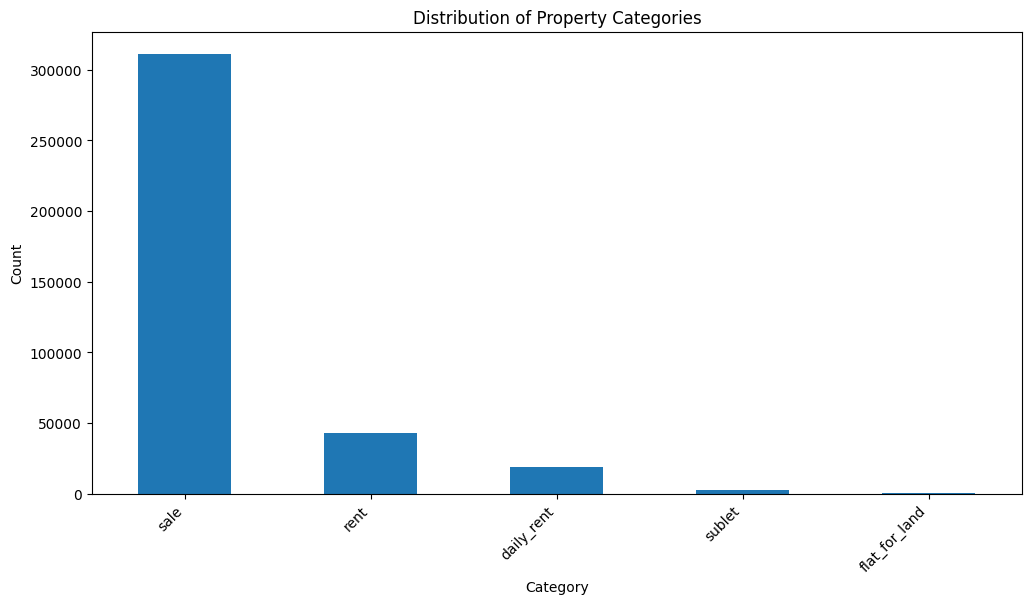

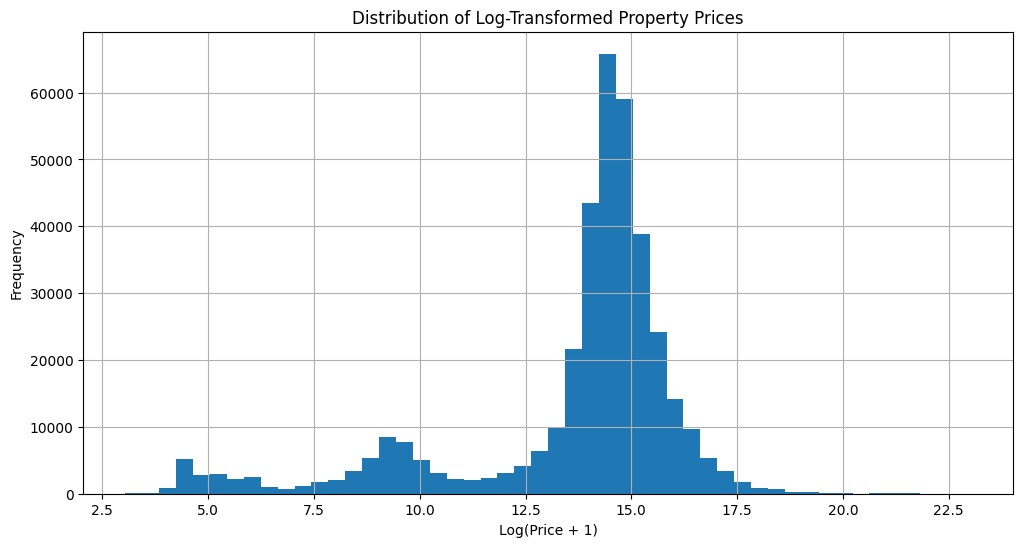

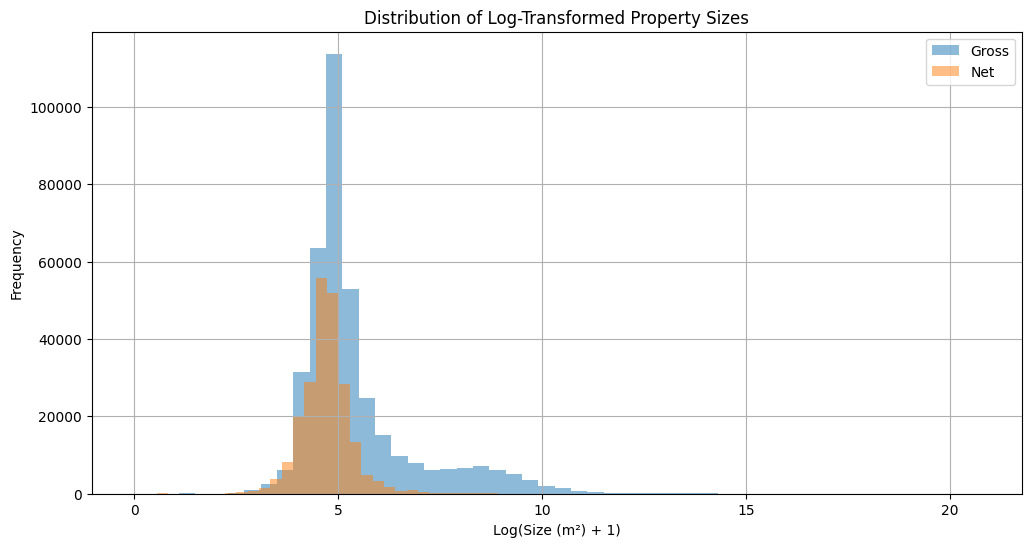

In [23]:
# Distribution of property categories
plt.figure(figsize=(12, 6))
ilan_2['kategori_1'].value_counts().plot(kind='bar')
plt.title('Distribution of Property Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

import numpy as np

# For price distribution
plt.figure(figsize=(12, 6))
ilan_2['ilan_fiyat'].apply(lambda x: np.log1p(x)).hist(bins=50)
plt.title('Distribution of Log-Transformed Property Prices')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()

# For size distribution
plt.figure(figsize=(12, 6))
ilan_2['m2_gross'].apply(lambda x: np.log1p(x)).hist(bins=50, alpha=0.5, label='Gross')
ilan_2['m2_net'].apply(lambda x: np.log1p(x)).hist(bins=50, alpha=0.5, label='Net')
plt.title('Distribution of Log-Transformed Property Sizes')
plt.xlabel('Log(Size (m²) + 1)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [24]:
numeric_columns = ['bina_kat_sayisi', 'oda_sayisi', 'ilan_kat_sayisi']

for col in numeric_columns:
    ilan_2[col] = pd.to_numeric(ilan_2[col], errors='coerce')
    ilan_2[col] = ilan_2[col].astype('Int64')  



In [25]:
print(ilan_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376618 entries, 0 to 376617
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               376618 non-null  int64  
 1   kategori_1       376618 non-null  object 
 2   kategori_2       376618 non-null  object 
 3   kategori_3       376618 non-null  object 
 4   mahalle          376618 non-null  object 
 5   ilce             376090 non-null  object 
 6   il               376618 non-null  object 
 7   ilan_baslik      376618 non-null  object 
 8   ilan_fiyat       376070 non-null  float64
 9   m2_gross         376050 non-null  float64
 10  m2_net           225843 non-null  float64
 11  bina_kat_sayisi  226160 non-null  Int64  
 12  oda_sayisi       18083 non-null   Int64  
 13  ilan_kat_sayisi  190971 non-null  Int64  
dtypes: Int64(3), float64(3), int64(1), object(7)
memory usage: 41.3+ MB
None


Correlation low probably due to the type of properties

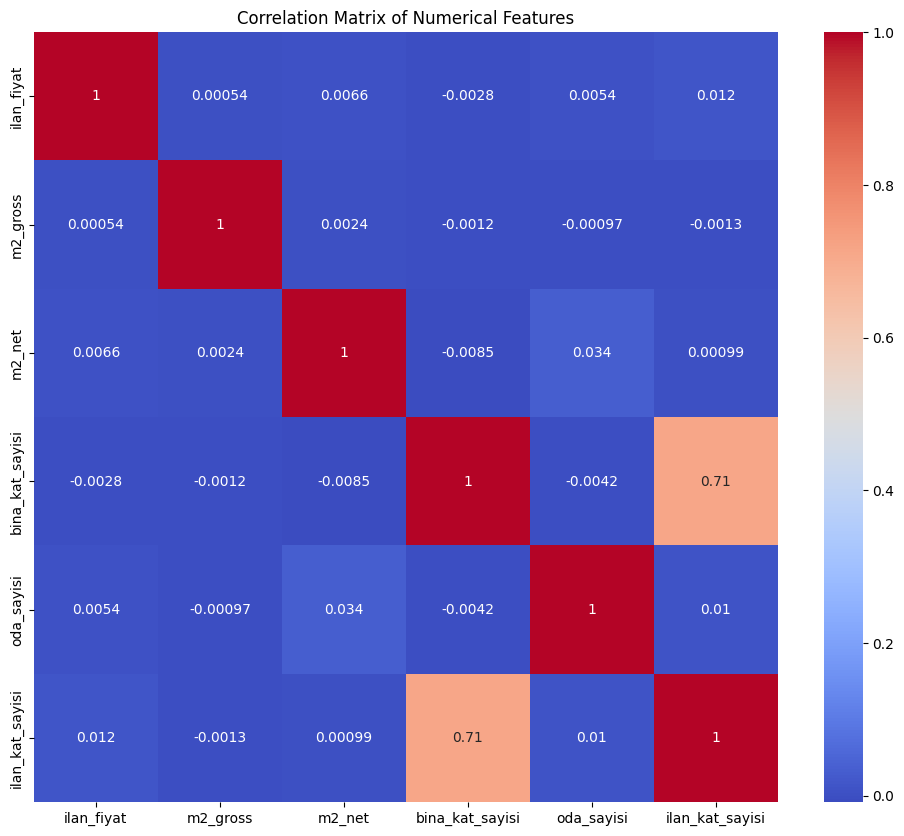

In [26]:
# Correlation matrix of numerical features
numeric_columns = ['ilan_fiyat', 'm2_gross', 'm2_net', 'bina_kat_sayisi', 'oda_sayisi', 'ilan_kat_sayisi']
correlation_matrix = ilan_2[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Step 2: Data Preprocessing

ilan_3 == ilan_2 with handled missing values


davranis_3 == davranis_2 with handled missing values

In [27]:
ilan_3 = pd.DataFrame(ilan_2)
davranis_3 = pd.DataFrame(davranis_2)

In [28]:
print(ilan_3.isnull().sum())

id                      0
kategori_1              0
kategori_2              0
kategori_3              0
mahalle                 0
ilce                  528
il                      0
ilan_baslik             0
ilan_fiyat            548
m2_gross              568
m2_net             150775
bina_kat_sayisi    150458
oda_sayisi         358535
ilan_kat_sayisi    185647
dtype: int64


In [29]:
print(davranis_3.isnull().sum())

session_id                 0
timestamp                306
product_id                 0
client_id                  0
product_list_name          0
query                      0
event_type                 0
transaction_type           0
il                         0
ilce                       0
mahalle                    0
kategori_3                 0
product_list_position      0
kategori_1                 0
kategori_2                 0
hour                     306
day_of_week              306
dtype: int64


#### Since the null values are very low, we do not need a very sophisticated approach in user 

In [30]:
print(davranis_3['timestamp'].unique())

<DatetimeArray>
['2023-07-04 20:58:02.820000', '2023-07-04 19:21:34.769000',
 '2023-07-04 19:22:56.962000', '2023-07-04 17:22:15.628000',
 '2023-07-04 19:30:16.315000', '2023-07-04 16:01:43.863000',
 '2023-07-03 21:44:58.239000', '2023-07-04 06:49:41.751000',
 '2023-07-04 09:58:00.341000', '2023-07-04 07:34:23.676000',
 ...
 '2023-07-03 10:02:08.594000', '2023-07-03 12:02:55.592000',
 '2023-07-03 09:30:46.596000', '2023-07-02 22:13:13.187000',
 '2023-07-03 19:44:59.266000', '2023-07-03 12:27:57.570000',
 '2023-07-03 20:24:34.427000', '2023-07-03 19:17:00.929000',
 '2023-07-03 11:24:58.113000', '2023-07-03 17:40:25.336000']
Length: 322207, dtype: datetime64[ns]


In [31]:
null_indices = davranis_3[davranis_3['timestamp'].isnull()].index
half_size = len(null_indices) // 2

# split the null indices into two halves
first_half_indices = null_indices[:half_size]
second_half_indices = null_indices[half_size:]

# fill the first half with 2023-07-04 19:00:00.000000
davranis_3.loc[first_half_indices, 'timestamp'] = pd.Timestamp('2023-07-04 19:00:00.000000')

# fill the second half with 2023-07-03 19:00:00.000000
davranis_3.loc[second_half_indices, 'timestamp'] = pd.Timestamp('2023-07-03 19:00:00.000000')

# verify the result
print(f"Missing values in 'timestamp' after filling: {davranis_3['timestamp'].isnull().sum()}")

Missing values in 'timestamp' after filling: 0


In [134]:
hour_mode = davranis_3['hour'].mode()[0]
day_of_week_mode = davranis_3['day_of_week'].mode()[0]

davranis_3['hour'] = davranis_3['hour'].fillna(hour_mode)
davranis_3['day_of_week'] = davranis_3['day_of_week'].fillna(day_of_week_mode)

print(davranis_3.isnull().sum())


session_id               0
timestamp                0
product_id               0
client_id                0
product_list_name        0
query                    0
event_type               0
transaction_type         0
il                       0
ilce                     0
mahalle                  0
kategori_3               0
product_list_position    0
kategori_1               0
kategori_2               0
hour                     0
day_of_week              0
dtype: int64


USer Done!

#### Null 'ilce', complete with the mode of the regarding 'il'

In [32]:
# create a dictionary of most common ilce for each il
il_ilce_mode = ilan_3.groupby('il')['ilce'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
il_ilce_dict = il_ilce_mode.to_dict()
print(il_ilce_dict)

{'Adana': 'Çukurova', 'Adıyaman': 'Adıyaman Merkez', 'Afyonkarahisar': 'Afyonkarahisar Merkez', 'Aksaray': 'Aksaray Merkez', 'Amasya': 'Amasya Merkez', 'Ankara': 'Keçiören', 'Antalya': 'Alanya', 'Ardahan': 'Ardahan Merkez', 'Artvin': 'Yusufeli', 'Aydın': 'Kuşadası', 'Ağrı': 'Ağrı Merkez', 'Balıkesir': 'Edremit', 'Bartın': 'Bartın Merkez', 'Batman': 'Batman Merkez', 'Bayburt': 'Bayburt Merkez', 'Bilecik': 'Osmaneli', 'Bingöl': 'Bingöl Merkez', 'Bitlis': 'Tatvan', 'Bolu': 'Bolu Merkez', 'Burdur': 'Burdur Merkez', 'Bursa': 'Nilüfer', 'Denizli': 'Merkezefendi', 'Diyarbakır': 'Kayapınar', 'Düzce': 'Düzce Merkez', 'Edirne': 'Keşan', 'Elazığ': 'Elazığ Merkez', 'Erzincan': 'Erzincan Merkez', 'Erzurum': 'Yakutiye', 'Eskişehir': 'Tepebaşı', 'Gaziantep': 'Şahinbey', 'Giresun': 'Giresun Merkez', 'Gümüşhane': 'Gümüşhane Merkez', 'Hakkari': 'Yüksekova', 'Hatay': 'İskenderun', 'Isparta': 'Isparta Merkez', 'Iğdır': 'Iğdır Merkez', 'KKTC': nan, 'Kahramanmaraş': 'Onikişubat', 'Karabük': 'Karabük Merkez'

In [33]:
# function to fill missing ilce
def fill_ilce(row):
    if pd.isnull(row['ilce']):
        return il_ilce_dict.get(row['il'], np.nan)
    return row['ilce']

ilan_3['ilce'] = ilan_3.apply(fill_ilce, axis=1)

print(f"Missing values in 'ilce' after filling: {ilan_3['ilce'].isnull().sum()}")

Missing values in 'ilce' after filling: 528


All the nulls belongs to KKTC, so ilce filled with 'kktc'

In [34]:
filter_missing_ilce = ilan_3[ilan_3['ilce'].isnull()]
print(filter_missing_ilce['il'].unique())
ilan_3.loc[ilan_3['ilce'].isnull(), 'ilce'] = 'kktc'

['KKTC']


#### Null 'm2_gross' and 'ilan_fiyat' has been dropped, due to their small count and varience in those categories across the listing type

In [35]:
ilan_3.dropna(subset=['ilan_fiyat', 'm2_gross'], inplace=True)
print(f"Rows remaining after dropping missing 'ilan_fiyat' and 'm2_gross': {len(ilan_2)}")

Rows remaining after dropping missing 'ilan_fiyat' and 'm2_gross': 376618


### Null values in the 'm2_net', 'bina_kat_sayisi', and 'ilan_kat_sayisi' are more complex, due to the property type. Null values also covers 'not-applicable' for 'arsa' type etc. More sophisticated approach required

In [40]:
print(ilan_3['kategori_2'].unique())

['isyeri' 'konut' 'arsa']


In [41]:
filter_missing_netm2 = ilan_3[ilan_3['m2_net'].isnull()]
print(filter_missing_ilce['kategori_2'].unique())


['konut' 'isyeri' 'turistik-tesis' 'arsa']


In [51]:
housing_categories = ['konut']  

def missing_m2(row):
    if row['kategori_2'] in housing_categories:
        if pd.isnull(row['m2_net']):
            row['m2_net'] = row['m2_gross'] * 0.85  # assuming net is about 85% of gross
    else:
        if pd.isnull(row['m2_net']):
            row['m2_net'] = 'Not Applicable'
    return row

ilan_3 = ilan_3.apply(missing_m2, axis=1)


In [48]:
housing_categories = ['konut']

# precompute medians 
housing_medians = ilan_3[ilan_3['kategori_2'].isin(housing_categories)][['bina_kat_sayisi', 'ilan_kat_sayisi', 'oda_sayisi']].median()

# function to fill missing values
def missing_m2(row):
    if row['kategori_2'] in housing_categories:
        if pd.isnull(row['bina_kat_sayisi']):
            row['bina_kat_sayisi'] = housing_medians['bina_kat_sayisi']
        if pd.isnull(row['ilan_kat_sayisi']):
            row['ilan_kat_sayisi'] = housing_medians['ilan_kat_sayisi']
        if pd.isnull(row['oda_sayisi']):
            row['oda_sayisi'] = housing_medians['oda_sayisi']
    else:
        if pd.isnull(row['bina_kat_sayisi']):
            row['bina_kat_sayisi'] = 'Not Applicable'
        if pd.isnull(row['ilan_kat_sayisi']):
            row['ilan_kat_sayisi'] = 'Not Applicable'
        if pd.isnull(row['oda_sayisi']):
            row['oda_sayisi'] = 'Not Applicable'
        
    return row


ilan_3 = ilan_3.apply(missing_m2, axis=1)
print(ilan_3[['bina_kat_sayisi', 'ilan_kat_sayisi', 'oda_sayisi']].isnull().sum())


bina_kat_sayisi    0
ilan_kat_sayisi    0
oda_sayisi         0
dtype: int64


In [119]:
print(ilan_3.isnull().sum())


id                 0
kategori_1         0
kategori_2         0
kategori_3         0
mahalle            0
ilce               0
il                 0
ilan_baslik        0
ilan_fiyat         0
m2_gross           0
m2_net             0
bina_kat_sayisi    0
oda_sayisi         0
ilan_kat_sayisi    0
dtype: int64


Ad Done!

## Step 3: Feature Engineering:

In [50]:
from collections import Counter

In [52]:
empty_groups = [client_id for client_id, group in davranis_3.groupby('client_id') if group.empty]
print(f"Number of empty groups: {len(empty_groups)}")
if empty_groups:
    print("Client IDs with empty groups:", empty_groups)

Number of empty groups: 0


In [54]:
empty_groups = [client_id for client_id, group in ilan_3.groupby('id') if group.empty]
print(f"Number of empty groups: {len(empty_groups)}")
if empty_groups:
    print("Client IDs with empty groups:", empty_groups)

Number of empty groups: 0


### User Feature Engineering

In [55]:
def create_user_features(group):
    features = {}
    
    # Helper function to safely get the first element
    def safe_first(series):
        return series.iloc[0] if not series.empty else None
    
    # Helper function to safely get mode
    def safe_mode(series):
        mode = series.mode()
        return mode.iloc[0] if not mode.empty else None
    
    # Interaction counts
    features['total_interactions'] = len(group)
    features['unique_products_viewed'] = group.get('product_id', pd.Series()).nunique()
    
    # Query complexity
    query_series = group.get('query', pd.Series())
    features['avg_query_complexity'] = query_series.str.count('&').mean() + 1 if not query_series.empty else 0
    
    # Event type counts
    event_type_series = group.get('event_type', pd.Series())
    if not event_type_series.empty:
        event_counts = event_type_series.value_counts()
        features['click_count'] = event_counts.get('click', 0)
        features['purchase'] = event_counts.get('purchase', 0)
        features['click_rate'] = features['click_count'] / features['total_interactions'] if features['total_interactions'] > 0 else 0
    
    # Category preferences
    for cat in ['kategori_1', 'kategori_2', 'kategori_3']:
        cat_series = group.get(cat, pd.Series())
        if not cat_series.empty:
            features[f'most_frequent_{cat}'] = safe_mode(cat_series)
            counter = Counter(cat_series.dropna())
            features[f'{cat}_preference'] = dict(counter.most_common(3))
    
    # Location preferences
    for loc in ['il', 'ilce']:
        loc_series = group.get(loc, pd.Series())
        if not loc_series.empty:
            features[f'most_searched_{loc}'] = safe_mode(loc_series)
            counter = Counter(loc_series.dropna())
            features[f'{loc}_preference'] = dict(counter.most_common(5))
    
    # Price interactions
    others_series = group.get('others', pd.Series())
    if not others_series.empty:
        def extract_price(others):
            try:
                return int(eval(others).get('max_fiyat', [0])[0])
            except:
                return 0
        
        prices = others_series.apply(extract_price)
        features['avg_price_interaction'] = prices.mean()
        # features['max_price_interaction'] = prices.max()
        # features['min_price_interaction'] = prices[prices > 0].min() if (prices > 0).any() else 0
    
    return features


In [81]:
# save the features for further merging
user_features_eng = {}
for client_id, group in davranis_3.groupby('client_id'):
    try:
        user_features_eng[client_id] = create_user_features(group)
    except Exception as e:
        print(f"Error processing client_id {client_id}: {str(e)}")

# convert to df
user_features_eng = pd.DataFrame.from_dict(user_features_eng, orient='index')

In [82]:
user_features_eng.to_csv('davranis_eng.csv', index=False)

In [83]:
print(user_features_eng.describe())

       total_interactions  unique_products_viewed  avg_query_complexity  \
count       130927.000000           130927.000000         130927.000000   
mean             2.466672                2.265484              1.230774   
std              2.552994                2.184075              1.509077   
min              1.000000                1.000000              1.000000   
25%              1.000000                1.000000              1.000000   
50%              2.000000                1.000000              1.000000   
75%              3.000000                3.000000              1.000000   
max             68.000000               42.000000             94.000000   

         click_count       purchase     click_rate  
count  130927.000000  130927.000000  130927.000000  
mean        2.248199       0.218473       0.916512  
std         2.406999       0.661199       0.234045  
min         0.000000       0.000000       0.000000  
25%         1.000000       0.000000       1.000000  
50%   

#### Correlation between engineered features' correlation map

Highly correlated values result with skewed results, must be removed

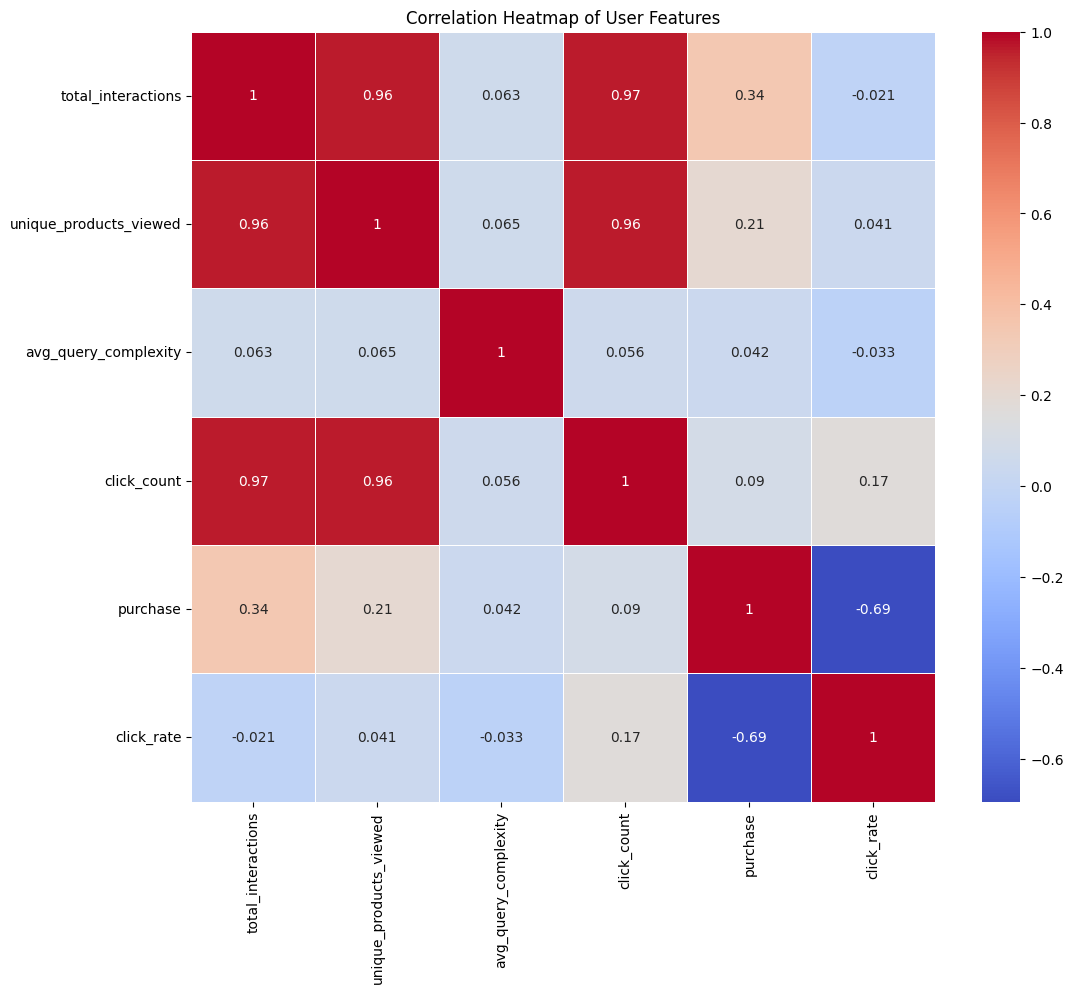

In [84]:
numerical_features = user_features_eng.select_dtypes(include=[np.number]).columns
corr = user_features_eng[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of User Features")
plt.show()

#### Most of the clients have singles session (due to time limit of the data), so for this case we need to drop 'unique_products_viewed' and 'click_count'

In [85]:
cols = ['unique_products_viewed', 'click_rate']


user_features_eng = user_features_eng.drop(columns=cols, errors='ignore')  
user_features_eng.columns

Index(['total_interactions', 'avg_query_complexity', 'click_count', 'purchase',
       'most_frequent_kategori_1', 'kategori_1_preference',
       'most_frequent_kategori_2', 'kategori_2_preference',
       'most_frequent_kategori_3', 'kategori_3_preference', 'most_searched_il',
       'il_preference', 'most_searched_ilce', 'ilce_preference'],
      dtype='object')

In [86]:
# function to flatten dictionary columns
def flatten_dict_col(column):
    return column.apply(lambda x: list(x.keys()) if isinstance(x, dict) else [])

# store unique counts
unique_counts = {}

# Loop through each column in user_nodes_df
for col in user_features_eng.columns:
    if user_features_eng[col].apply(lambda x: isinstance(x, dict)).any():
        # Flatten the dictionary column
        user_features_eng[col + '_flat'] = flatten_dict_col(user_features_eng[col])
        # Count unique values for the flattened column
        unique_counts[col + '_flat'] = sum(Counter(user_features_eng[col + '_flat'].sum()).values())
    else:
        # Count unique values for non-dictionary columns
        unique_counts[col] = len(pd.unique(user_features_eng[col]))

print(unique_counts)


{'total_interactions': 47, 'avg_query_complexity': 509, 'click_count': 47, 'purchase': 20, 'most_frequent_kategori_1': 2, 'kategori_1_preference_flat': 132565, 'most_frequent_kategori_2': 7, 'kategori_2_preference_flat': 132755, 'most_frequent_kategori_3': 153, 'kategori_3_preference_flat': 141939, 'most_searched_il': 82, 'il_preference_flat': 135274, 'most_searched_ilce': 1762, 'ilce_preference_flat': 143070}


In [139]:
def simplify(df):
    # remove dictionary columns
    dict_columns = [col for col in df.columns if df[col].dtype == 'object' and df[col].apply(lambda x: isinstance(x, dict)).any()]
    df = df.drop(columns=dict_columns)
    
    # convert list columns to strings
    list_columns = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, list)).any()]
    for col in list_columns:
        df[col] = df[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
    
    return df

simplify = simplify(user_features_eng)

In [140]:
print(simplify.columns.unique())
for col in simplify.columns:
    print(f"{col} {len(pd.unique(simplify[col]))}")

Index(['total_interactions', 'avg_query_complexity', 'click_count', 'purchase',
       'most_frequent_kategori_1', 'most_frequent_kategori_2',
       'most_frequent_kategori_3', 'most_searched_il', 'most_searched_ilce',
       'kategori_1_preference_flat', 'kategori_2_preference_flat',
       'kategori_3_preference_flat', 'il_preference_flat',
       'ilce_preference_flat'],
      dtype='object')
total_interactions 47
avg_query_complexity 509
click_count 47
purchase 20
most_frequent_kategori_1 2
most_frequent_kategori_2 7
most_frequent_kategori_3 153
most_searched_il 82
most_searched_ilce 1762
kategori_1_preference_flat 4
kategori_2_preference_flat 51
kategori_3_preference_flat 589
il_preference_flat 1400
ilce_preference_flat 6179


In [141]:
simplify.head()

,total_interactions,avg_query_complexity,click_count,purchase,most_frequent_kategori_1,most_frequent_kategori_2,most_frequent_kategori_3,most_searched_il,most_searched_ilce,kategori_1_preference_flat,kategori_2_preference_flat,kategori_3_preference_flat,il_preference_flat,ilce_preference_flat
5a0addd7c5b4eab21e04a7c5,1,1.0,1,0,satilik,konut,nan,nan,nan,satilik,konut,nan,nan,nan
DS1000000804.1687105942,1,1.0,1,0,satilik,konut,nan,kahramanmaras,kahramanmaras-onikisubat,satilik,konut,nan,kahramanmaras,kahramanmaras-onikisubat
DS1000017540.1688407967,1,1.0,1,0,kiralik,konut,daire,nan,nan,kiralik,konut,daire,nan,nan
DS1000030923.1667739739,1,1.0,1,0,satilik,arsa,zeytinlik,manisa,manisa-akhisar,satilik,arsa,zeytinlik,manisa,manisa-akhisar
DS1000036432.1688496254,1,1.0,0,1,kiralik,konut,daire,izmir,izmir-karabaglar,kiralik,konut,daire,izmir,izmir-karabaglar


In [144]:
simplify.replace(['nan'], np.nan, inplace=True)
print(simplify.isnull().sum())


total_interactions               0
avg_query_complexity             0
click_count                      0
purchase                         0
most_frequent_kategori_1         0
most_frequent_kategori_2         0
most_searched_il              1908
kategori_1_preference_flat       0
kategori_2_preference_flat       0
il_preference_flat            1728
dtype: int64


In [145]:
### Handle with the nan
cols = ['most_frequent_kategori_3', 'kategori_3_preference_flat', 'most_searched_ilce', 'ilce_preference_flat']


simplify = simplify.drop(columns=cols, errors='ignore')  
simplify.columns

Index(['total_interactions', 'avg_query_complexity', 'click_count', 'purchase',
       'most_frequent_kategori_1', 'most_frequent_kategori_2',
       'most_searched_il', 'kategori_1_preference_flat',
       'kategori_2_preference_flat', 'il_preference_flat'],
      dtype='object')

In [146]:
simplify = simplify.dropna(subset=['most_searched_il']) # Drop rows with None values in 'product_id'

###  Merge Preprocessed data with the Engineered

In [147]:
# Reset the index of simplify to make client_id a regular column
simplify = simplify.reset_index().rename(columns={'index': 'client_id'})

# Merge the DataFrames
davranis_all = pd.merge(davranis_3, simplify, on='client_id', how='inner')

# Check the result
print(davranis_all.head())
print(davranis_all.columns)
print(davranis_all.isnull().sum())


                             session_id               timestamp  product_id  \
0  b1f007aa-1f0a-4d9f-9cd0-7fe0d6e79de6 2023-07-04 20:58:02.820    13505245   
1  9a8699ef-593b-41a3-85c6-767ce478ef35 2023-07-04 17:22:15.628    13505616   
2  ef05e658-5848-4dfe-a2c3-ac8b0b8b3873 2023-07-04 19:30:16.315    13505616   
3  a6247984-04c0-444b-bdf0-72f4e7b01afe 2023-07-04 06:49:41.751    13501363   
4  8c8d0d22-bedf-4b65-9cbd-43a799cccbe3 2023-07-04 09:58:00.341    13502519   

                 client_id product_list_name  \
0    DS22495690.1688504111    ilan-listeleme   
1  DS1093390036.1681374194    ilan-listeleme   
2   DS643656975.1687979603    ilan-listeleme   
3  DS1360012402.1688395979    ilan-listeleme   
4   DS241577036.1686504625    ilan-listeleme   

                                               query event_type  \
0  /satilik-daire/istanbul/?max_fiyat=1000000&yat...      click   
1                                     /satilik-arsa/      click   
2                                  

In [148]:
davranis_all.columns

Index(['session_id', 'timestamp', 'product_id', 'client_id',
       'product_list_name', 'query', 'event_type', 'transaction_type', 'il',
       'ilce', 'mahalle', 'kategori_3', 'product_list_position', 'kategori_1',
       'kategori_2', 'hour', 'day_of_week', 'total_interactions',
       'avg_query_complexity', 'click_count', 'purchase',
       'most_frequent_kategori_1', 'most_frequent_kategori_2',
       'most_searched_il', 'kategori_1_preference_flat',
       'kategori_2_preference_flat', 'il_preference_flat'],
      dtype='object')

In [149]:
print(davranis_all.isnull().sum())

session_id                    0
timestamp                     0
product_id                    0
client_id                     0
product_list_name             0
query                         0
event_type                    0
transaction_type              0
il                            0
ilce                          0
mahalle                       0
kategori_3                    0
product_list_position         0
kategori_1                    0
kategori_2                    0
hour                          0
day_of_week                   0
total_interactions            0
avg_query_complexity          0
click_count                   0
purchase                      0
most_frequent_kategori_1      0
most_frequent_kategori_2      0
most_searched_il              0
kategori_1_preference_flat    0
kategori_2_preference_flat    0
il_preference_flat            0
dtype: int64


User Features Done!

## Ad Feature Engineering:

In [166]:
import re

In [120]:
ilan_3['id'].head()

0     8573826
1     9287649
2     9759525
3     9915149
4    10625509
Name: id, dtype: int64

ilan_3['id'] == davranis_3['product_id']

In [158]:
davranis_3['product_id'].head()

0    13505245
1    13505409
2    13505693
3    13505616
4    13505616
Name: product_id, dtype: int64

In [170]:
ad_merged_user = pd.merge(ilan_3, davranis_3, left_on='id', right_on='product_id', how='outer', suffixes=('_x', '_y'))
ad_merged_user['ad_id'] = ad_merged_user['product_id'].fillna(ad_merged_user['id'])

In [171]:
ad_merged_user.columns

Index(['id', 'kategori_1_x', 'kategori_2_x', 'kategori_3_x', 'mahalle_x',
       'ilce_x', 'il_x', 'ilan_baslik', 'ilan_fiyat', 'm2_gross', 'm2_net',
       'bina_kat_sayisi', 'oda_sayisi', 'ilan_kat_sayisi', 'session_id',
       'timestamp', 'product_id', 'client_id', 'product_list_name', 'query',
       'event_type', 'transaction_type', 'il_y', 'ilce_y', 'mahalle_y',
       'kategori_3_y', 'product_list_position', 'kategori_1_y', 'kategori_2_y',
       'hour', 'day_of_week', 'ad_id'],
      dtype='object')

In [172]:
print(ad_merged_user.isna().sum())

id                         3142
kategori_1_x               3142
kategori_2_x               3142
kategori_3_x               3142
mahalle_x                  3142
ilce_x                     3142
il_x                       3142
ilan_baslik                3142
ilan_fiyat                 3142
m2_gross                   3142
m2_net                     3142
bina_kat_sayisi            3142
oda_sayisi                 3142
ilan_kat_sayisi            3142
session_id               297274
timestamp                297274
product_id               297274
client_id                297274
product_list_name        297274
query                    297274
event_type               297274
transaction_type         297274
il_y                     297274
ilce_y                   297274
mahalle_y                297274
kategori_3_y             297274
product_list_position    297274
kategori_1_y             297274
kategori_2_y             297274
hour                     297274
day_of_week              297274
ad_id   

In [173]:
# drop after merging
columns_to_drop = [
    'product_id', 'il_y', 'ilce_y', 'mahalle_y', 'kategori_1_y', 'kategori_2_y', 'kategori_3_y'
]

ad_merged_user = ad_merged_user.drop(columns=columns_to_drop)
print(f"Shape of merged DataFrame: {ad_merged_user.shape}")
print("\nColumns in merged DataFrame:")
print(ad_merged_user.columns)

# save 
ad_merged_user.to_csv('ad_merged_user.csv', index=False)

Shape of merged DataFrame: (620228, 25)

Columns in merged DataFrame:
Index(['id', 'kategori_1_x', 'kategori_2_x', 'kategori_3_x', 'mahalle_x',
       'ilce_x', 'il_x', 'ilan_baslik', 'ilan_fiyat', 'm2_gross', 'm2_net',
       'bina_kat_sayisi', 'oda_sayisi', 'ilan_kat_sayisi', 'session_id',
       'timestamp', 'client_id', 'product_list_name', 'query', 'event_type',
       'transaction_type', 'product_list_position', 'hour', 'day_of_week',
       'ad_id'],
      dtype='object')


#### Unique /Continues Variables

In [174]:
def write_unique_values_to_file(df, columns, filename):
    with open(filename, 'w') as f:
        for col in columns:
            unique_values = df[col].unique()
            f.write(f"Unique values in {col}:\n")
            for value in unique_values:
                f.write(f"{value}\n")
            f.write("\n")

# Use the function
columns_to_check = ['m2_gross', 'ilan_fiyat',  'm2_net', 'oda_sayisi', 'ilan_kat_sayisi',  'bina_kat_sayisi', 'product_list_name']
write_unique_values_to_file(ad_merged_user, columns_to_check, 'unique_values.txt')

In [175]:
for col in ad_merged_user.columns:
    print(f"{col} {len(pd.unique(ad_merged_user[col]))}")

id 375503
kategori_1_x 6
kategori_2_x 4
kategori_3_x 61
mahalle_x 11214
ilce_x 832
il_x 83
ilan_baslik 346106
ilan_fiyat 8465
m2_gross 13397
m2_net 2264
bina_kat_sayisi 64
oda_sayisi 39
ilan_kat_sayisi 41
session_id 162655
timestamp 322209
client_id 130928
product_list_name 3
query 40458
event_type 3
transaction_type 7
product_list_position 31
hour 25
day_of_week 8
ad_id 375879


In [198]:
def categorize_floor(row):
    value = row['ilan_kat_sayisi']
    kategori_2 = row['kategori_2_x']

    # Check if it's 'arsa' or 'isyeri'
    if kategori_2 in ['arsa', 'isyeri']:
        return 'Not-Applicable'

    if pd.isna(value):
        return 'Unknown'
    
    value = str(value).lower()
    
    # Ground floor and near-ground floor categories
    if any(term in value for term in ['giriş', 'bahçe katı', 'yüksek giriş', 'düz giriş']):
        return 'Ground/Near-Ground'
    
    # Special types
    if any(term in value for term in ['dublex', 'dubleks', 'villa', 'müstakil', 'çatı katı', 'penthouse']):
        return 'Special Type'
    
    # Below ground floors
    if any(term in value for term in ['bodrum', 'kot']):
        return 'Below Ground'
    
    # Try to extract a number
    try:
        floor = int(re.findall(r'\d+', value)[0])
    except (ValueError, IndexError):
        return 'Other'
    
    # Categorize based on floor number
    if 1 <= floor <= 3:
        return 'Low Floor (1-3)'
    elif 4 <= floor <= 9:
        return 'Mid Floor (4-9)'
    elif 10 <= floor <= 20:
        return 'High Floor (10-20)'
    elif floor > 20:
        return 'Very High Floor (21+)'
    else:
        return 'Other'

# Apply the categorization
ad_merged_user['floor_category'] = ad_merged_user.apply(categorize_floor, axis=1)

# Print the distribution of floor categories
print(ad_merged_user['floor_category'].value_counts(normalize=True))

# Print the distribution of floor categories for residential properties
residential_df = ad_merged_user[ad_merged_user['kategori_2_x'].isin(['konut', np.nan])]

print("\nDistribution of floor categories for residential properties:")
print(residential_df['floor_category'].value_counts(normalize=True))

# Print the count of 'Unknown' for residential properties
unknown_count = (residential_df['floor_category'] == 'Unknown').sum()
print(f"\nNumber of 'Unknown' floor categories for residential properties: {unknown_count}")

floor_category
Low Floor (1-3)          0.608438
Not-Applicable           0.186336
Mid Floor (4-9)          0.176058
High Floor (10-20)       0.022629
Unknown                  0.005066
Very High Floor (21+)    0.001474
Name: proportion, dtype: float64

Distribution of floor categories for residential properties:
floor_category
Low Floor (1-3)          0.747775
Mid Floor (4-9)          0.216377
High Floor (10-20)       0.027811
Unknown                  0.006226
Very High Floor (21+)    0.001811
Name: proportion, dtype: float64

Number of 'Unknown' floor categories for residential properties: 3142


In [201]:
def categorize_m2_gross(row):
    if row['kategori_2_x'] == 'arsa':  # For land
        bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, float('inf')]
        labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-50000', 
                  '50000-100000', '100000-500000', '500000-1000000', '1000000+']
    else:  # For residency and other property types
        bins = [0, 50, 70, 90, 110, 130, 150, 200, 250, 300, 500, float('inf')]
        labels = ['0-50', '50-70', '70-90', '90-110', '110-130', '130-150', '150-200', 
                  '200-250', '250-300', '300-500', '500+']
    
    return pd.cut([row['m2_gross']], bins=bins, labels=labels, include_lowest=True)[0]

ad_merged_user['m2_gross_category'] = ad_merged_user.apply(categorize_m2_gross, axis=1)
print("Distribution of m2_gross_category:")
print(ad_merged_user['m2_gross_category'].value_counts())


Distribution of m2_gross_category:
m2_gross_category
90-110            85296
110-130           84700
150-200           76670
130-150           71201
70-90             70540
50-70             53055
0-50              27454
1000-5000         26233
200-250           25193
100-500           21004
300-500           15402
500-1000          12528
250-300           11368
5000-10000        11252
500+              11223
10000-50000       11045
0-100              1001
50000-100000        858
100000-500000       593
1000000+            348
500000-1000000      122
Name: count, dtype: int64


In [203]:
ad_merged_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620228 entries, 0 to 620227
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     617086 non-null  float64       
 1   kategori_1_x           617086 non-null  object        
 2   kategori_2_x           617086 non-null  object        
 3   kategori_3_x           617086 non-null  object        
 4   mahalle_x              617086 non-null  object        
 5   ilce_x                 617086 non-null  object        
 6   il_x                   617086 non-null  object        
 7   ilan_baslik            617086 non-null  object        
 8   ilan_fiyat             617086 non-null  float64       
 9   m2_gross               617086 non-null  float64       
 10  m2_net                 617086 non-null  object        
 11  bina_kat_sayisi        617086 non-null  object        
 12  oda_sayisi             518532 non-null  Int6

In [210]:
ad_merged_user['m2_net'] = pd.to_numeric(ad_merged_user['m2_net'], errors='coerce')
ad_merged_user['m2_net'] = ad_merged_user['m2_net'].fillna(0)
ad_merged_user['m2_net'] = ad_merged_user['m2_net'].astype('int64')

In [211]:
def categorize_m2_net(row):
    if row['kategori_2_x'] == 'arsa':  # For land
        bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, float('inf')]
        labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-50000', 
                  '50000-100000', '100000-500000', '500000-1000000', '1000000+']
    else:  # For residency and other property types
        bins = [0, 50, 70, 90, 110, 130, 150, 200, 250, 300, 500, float('inf')]
        labels = ['0-50', '50-70', '70-90', '90-110', '110-130', '130-150', '150-200', 
                  '200-250', '250-300', '300-500', '500+']
    
    return pd.cut([row['m2_net']], bins=bins, labels=labels, include_lowest=True)[0]

ad_merged_user['m2_net_category'] = ad_merged_user.apply(categorize_m2_net, axis=1)
print("Distribution of m2_gross_category:")
print(ad_merged_user['m2_gross_category'].value_counts())

ad_merged_user['m2_net_category'] = ad_merged_user.apply(categorize_m2_net, axis=1)
print("Distribution of m2_net_category:")
print(ad_merged_user['m2_net_category'].value_counts())


Distribution of m2_gross_category:
m2_gross_category
90-110            85296
110-130           84700
150-200           76670
130-150           71201
70-90             70540
50-70             53055
0-50              27454
1000-5000         26233
200-250           25193
100-500           21004
300-500           15402
500-1000          12528
250-300           11368
5000-10000        11252
500+              11223
10000-50000       11045
0-100              1001
50000-100000        858
100000-500000       593
1000000+            348
500000-1000000      122
Name: count, dtype: int64
Distribution of m2_net_category:
m2_net_category
70-90      96477
90-110     92462
0-100      84984
110-130    81743
50-70      59796
0-50       58638
130-150    55151
150-200    51840
200-250    14824
300-500     9375
250-300     8031
500+        6907
Name: count, dtype: int64


In [213]:
ad_merged_user['ilan_fiyat'] = pd.to_numeric(ad_merged_user['ilan_fiyat'], errors='coerce')
ad_merged_user['ilan_fiyat'] = ad_merged_user['ilan_fiyat'].fillna(0)
ad_merged_user['ilan_fiyat'] = ad_merged_user['ilan_fiyat'].astype('int64')



def categorize_ilan_fiyat(row):
    if pd.isna(row['ilan_fiyat']):
        return 'Unknown'
    
    if pd.isna(row['kategori_1_x']):
        return 'Unknown'
    
    if row['kategori_1_x'] in ['rent', 'daily_rent', 'sublet']:  # For rent
        bins = [0, 1000, 2000, 3000, 5000, 7500, 10000, 15000, 20000, 30000, float('inf')]
        labels = ['0-1000', '1000-2000', '2000-3000', '3000-5000', '5000-7500', '7500-10000', 
                  '10000-15000', '15000-20000', '20000-30000', '30000+']
    elif row['kategori_1_x'] == 'sale':  # For sale
        bins = [0, 500000, 1000000, 1500000, 2000000, 3000000, 5000000, 7500000, 10000000, 15000000, float('inf')]
        labels = ['0-500K', '500K-1M', '1M-1.5M', '1.5M-2M', '2M-3M', '3M-5M', '5M-7.5M', 
                  '7.5M-10M', '10M-15M', '15M+']
    elif row['kategori_1_x'] == 'flat_for_land':
        return 'Not-Applicable'
    else:
        print(f"Unexpected kategori_1_x: {row['kategori_1_x']}")
        return 'Other'
    
    try:
        return pd.cut([row['ilan_fiyat']], bins=bins, labels=labels, include_lowest=True)[0]
    except ValueError as e:
        print(f"Error categorizing ilan_fiyat: {row['ilan_fiyat']} for kategori_1: {row['kategori_1']}")
        print(f"Error message: {str(e)}")
        return 'Error'

# Apply the function to create a new column 'ilan_fiyat_category'
ad_merged_user['ilan_fiyat_category'] = ad_merged_user.apply(categorize_ilan_fiyat, axis=1)

# Print the distribution of the new categories
print("\nDistribution of ilan_fiyat_category:")
print(ad_merged_user['ilan_fiyat_category'].value_counts())


Distribution of ilan_fiyat_category:
ilan_fiyat_category
2M-3M             74552
1.5M-2M           61378
3M-5M             59059
1M-1.5M           59032
500K-1M           44814
7500-10000        42418
5000-7500         39743
0-1000            35529
10000-15000       32088
5M-7.5M           27759
3000-5000         25680
0-500K            21791
15M+              15677
30000+            15262
7.5M-10M          12959
1000-2000         12012
10M-15M           11596
2000-3000         10121
15000-20000        9455
20000-30000        6159
Unknown            3142
Not-Applicable        2
Name: count, dtype: int64


In [215]:
ad_merged_user.columns

Index(['id', 'kategori_1_x', 'kategori_2_x', 'kategori_3_x', 'mahalle_x',
       'ilce_x', 'il_x', 'ilan_baslik', 'ilan_fiyat', 'm2_gross', 'm2_net',
       'bina_kat_sayisi', 'oda_sayisi', 'ilan_kat_sayisi', 'session_id',
       'timestamp', 'client_id', 'product_list_name', 'query', 'event_type',
       'transaction_type', 'product_list_position', 'hour', 'day_of_week',
       'ad_id', 'room_category', 'floor_category', 'm2_gross_category',
       'm2_net_category', 'ilan_fiyat_category'],
      dtype='object')

In [218]:
def create_ad_features(group):
    features = {}

    features['ad_id'] = group.name
    
    # Basic Information
    features['kategori_1_x'] = group['kategori_1_x'].iloc[0] if pd.notna(group['kategori_1_x'].iloc[0]) else pd.NA
    features['kategori_2_x'] = group['kategori_2_x'].iloc[0] if pd.notna(group['kategori_2_x'].iloc[0]) else pd.NA
    
    # Use the new categories
    features['floor_category'] = group['floor_category'].iloc[0] if pd.notna(group['floor_category'].iloc[0]) else pd.NA
    features['m2_gross_category'] = group['m2_gross_category'].iloc[0] if pd.notna(group['m2_gross_category'].iloc[0]) else pd.NA
    features['m2_net_category'] = group['m2_net_category'].iloc[0] if pd.notna(group['m2_net_category'].iloc[0]) else pd.NA
    features['ilan_fiyat_category'] = group['ilan_fiyat_category'].iloc[0] if pd.notna(group['ilan_fiyat_category'].iloc[0]) else pd.NA
    
    # Location
    features['il_x'] = group['il_x'].iloc[0] if pd.notna(group['il_x'].iloc[0]) else pd.NA
    features['ilce_x'] = group['ilce_x'].iloc[0] if pd.notna(group['ilce_x'].iloc[0]) else pd.NA
    features['mahalle_x'] = group['mahalle_x'].iloc[0] if pd.notna(group['mahalle_x'].iloc[0]) else pd.NA
        

    return pd.DataFrame(features, index=[0])

# Apply the function to create ad features
ad_nodes = ad_merged_user.groupby('ad_id').apply(create_ad_features).reset_index(drop=True)

# Print the first few rows and column names to verify
print(ad_nodes.head())
print("\nColumns:")
print(ad_nodes.columns)


       ad_id kategori_1_x kategori_2_x   floor_category m2_gross_category  \
0   127078.0         sale         arsa   Not-Applicable         1000-5000   
1   325571.0         sale        konut  Low Floor (1-3)           130-150   
2   645128.0         rent        konut  Low Floor (1-3)           200-250   
3   694703.0         sale         arsa   Not-Applicable           100-500   
4  1132386.0         rent        konut  Low Floor (1-3)           110-130   

  m2_net_category ilan_fiyat_category      il_x      ilce_x  \
0           0-100                15M+  İstanbul  Başakşehir   
1         110-130             5M-7.5M  İstanbul  Sancaktepe   
2         130-150              30000+     Muğla      Bodrum   
3           0-100               3M-5M     Hatay       Arsuz   
4          90-110           1000-2000     İzmir      Dikili   

                       mahalle_x  
0  Bahçeşehir 2. Kısım Mahallesi  
1        Veysel Karani Mahallesi  
2             Gündoğan Mahallesi  
3             Gözc

/tmp/ipykernel_1109168/4228328885.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ad_nodes = ad_merged_user.groupby('ad_id').apply(create_ad_features).reset_index(drop=True)


In [219]:
ad_nodes.columns

Index(['ad_id', 'kategori_1_x', 'kategori_2_x', 'floor_category',
       'm2_gross_category', 'm2_net_category', 'ilan_fiyat_category', 'il_x',
       'ilce_x', 'mahalle_x'],
      dtype='object')

In [220]:
ad_nodes.to_csv('ad_nodes.csv', index=False)

## Location Features

In [ ]:
def create_location_features(df, level):
    features = {}

    # Common features for all levels
    features['name'] = df[level].iloc[0]
    features['listing_count'] = len(df)
    features['total_value'] = df['ilan_fiyat'].sum()
    features['avg_price'] = df['ilan_fiyat'].mean()
    

    # Popular categories
    popular_categories = df['kategori_2_x'].value_counts().nlargest(3).index.tolist()
    features['popular_categories'] = popular_categories

    # Search count
    features['search_count'] = df['query'].str.contains(features['name'], case=False, na=False).sum()

    # View count
    features['view_count'] = df[~df['event_type'].isin(['click', 'favorite'])].shape[0]

    # Interaction count
    features['interaction_count'] = df[df['event_type'].isin(['click', 'favorite'])].shape[0]

    # Average price per square meter
    ad_merged_user['price_per_m2'] = ad_merged_user['ilan_fiyat'] / ad_merged_user['m2_gross']
    features['avg_m2_price'] = ad_merged_user['price_per_m2'].mean()

    # Popularity score
    days_in_data = (ad_merged_user['timestamp'].max() - ad_merged_user['timestamp'].min()).days + 1
    features['popularity_score'] = (features['search_count'] * 0.5 + 

                                    features['view_count'] * 0.3 + 

                                    features['interaction_count'] * 0.2) / days_in_data
    

    # Price trend
    ad_merged_user['date'] = pd.to_datetime(ad_merged_user['timestamp']).dt.date
    price_by_date = ad_merged_user.groupby('date')['ilan_fiyat'].mean()
    if len(price_by_date) > 1:
        features['price_trend'] = (price_by_date.iloc[-1] - price_by_date.iloc[0]) / price_by_date.iloc[0]
    else:
        features['price_trend'] = 0
    

    # Diversity index (using entropy)
    category_counts = ad_merged_user['kategori_2_x'].value_counts()
    features['diversity_index'] = entropy(category_counts)
    

    # Interaction rate
    features['interaction_rate'] = features['interaction_count'] / features['view_count'] if features['view_count'] > 0 else 0

    return features



# Create nodes for each level

province_nodes = ad_merged_user.groupby('il_x').apply(create_location_features, level='il_x').reset_index()
district_nodes = ad_merged_user.groupby(['il_x', 'ilce_x']).apply(create_location_features, level='ilce_x').reset_index()
neighborhood_nodes = ad_merged_user.groupby(['il_x', 'ilce_x', 'mahalle_x']).apply(create_location_features, level='mahalle_x').reset_index()


# Add parent information
district_nodes['parent_province'] = district_nodes['il_x']
neighborhood_nodes['parent_district'] = neighborhood_nodes['ilce_x']



# Combine all nodes
location_nodes = pd.concat([
    province_nodes.assign(level='province'),
    district_nodes.assign(level='district'),
    neighborhood_nodes.assign(level='neighborhood')
])



# Create hierarchical edges
hierarchical_edges = pd.concat([
    neighborhood_nodes[['mahalle_x', 'ilce_x']].rename(columns={'mahalle_x': 'from', 'ilce_x': 'to'}),
    district_nodes[['ilce', 'il']].rename(columns={'ilce_x': 'from', 'il_x': 'to'})
])

hierarchical_edges['edge_type'] = 'PART_OF'



# Create location to listing edges

location_listing_edges = pd.concat([
    ad_merged_user[['il', 'ad_id']].rename(columns={'il': 'from', 'ad_id': 'to'}),
    ad_merged_user[['ilce', 'ad_id']].rename(columns={'ilce': 'from', 'ad_id': 'to'}),
    ad_merged_user[['mahalle', 'ad_id']].rename(columns={'mahalle': 'from', 'ad_id': 'to'})
])

location_listing_edges['edge_type'] = 'CONTAINS'



# Create location to user edges
location_user_edges = ad_merged_user.groupby(['il', 'ilce', 'mahalle', 'client_id']).agg({
    'event_type': lambda x: list(x),
    'timestamp': 'max'
}).reset_index()



location_user_edges = pd.melt(location_user_edges, 
                              id_vars=['client_id', 'event_type', 'timestamp'],
                              value_vars=['il', 'ilce', 'mahalle'],
                              var_name='location_type',
                              value_name='location')


location_user_edges['interaction_type'] = location_user_edges['event_type'].apply(lambda x: ', '.join(set(x)))
location_user_edges['interaction_count'] = location_user_edges['event_type'].apply(len)
location_user_edges['last_interaction_time'] = location_user_edges['timestamp']



location_user_edges = location_user_edges[['location', 'client_id', 'interaction_type', 'interaction_count', 'last_interaction_time']]
location_user_edges.columns = ['from', 'to', 'interaction_type', 'interaction_count', 'last_interaction_time']
location_user_edges['edge_type'] = 'INTERACTED_BY'



# Save the results
location_nodes.to_csv('location_nodes.csv', index=False)
hierarchical_edges.to_csv('hierarchical_edges.csv', index=False)
location_listing_edges.to_csv('location_listing_edges.csv', index=False)
location_user_edges.to_csv('location_user_edges.csv', index=False)